# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    X_train_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_train_mean
    X_test_centered = X_test - X_train_mean

    covariance_matrix = np.cov(X_train_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    X_train_svd = X_train_centered @ top_eigenvectors
    X_test_svd = X_test_centered @ top_eigenvectors

    return X_train_svd, X_test_svd, top_eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time

# print(train_logistic_regression(X_train, y_train, X_test, y_test))


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [5,10,15,20,25,30,35,40,45,50] # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, top_eigenvectors = apply_svd_custom(X_train, X_test, n_components)


    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append({
        "n_components": n_components,
        "accuracy": accuracy,
        "training_time": training_time,
        "top_eigenvectors": top_eigenvectors
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# print('Final Results: ', results)

Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 0.7157 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 1.1413 seconds
Applying custom SVD with 15 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 15, Accuracy: 0.8424, Training time: 2.6076 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 3.5912 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8855, Training time: 5.3167 seconds
Applying custom SVD with 30 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.8922, Training time: 6.8187 seconds
Applying custom SVD with 35 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 35, Accuracy: 0.8999, Training time: 7.8319 seconds
Applying custom SVD with 40 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 40, Accuracy: 0.9022, Training time: 9.0010 seconds
Applying custom SVD with 45 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 45, Accuracy: 0.9064, Training time: 11.3000 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 13.6983 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


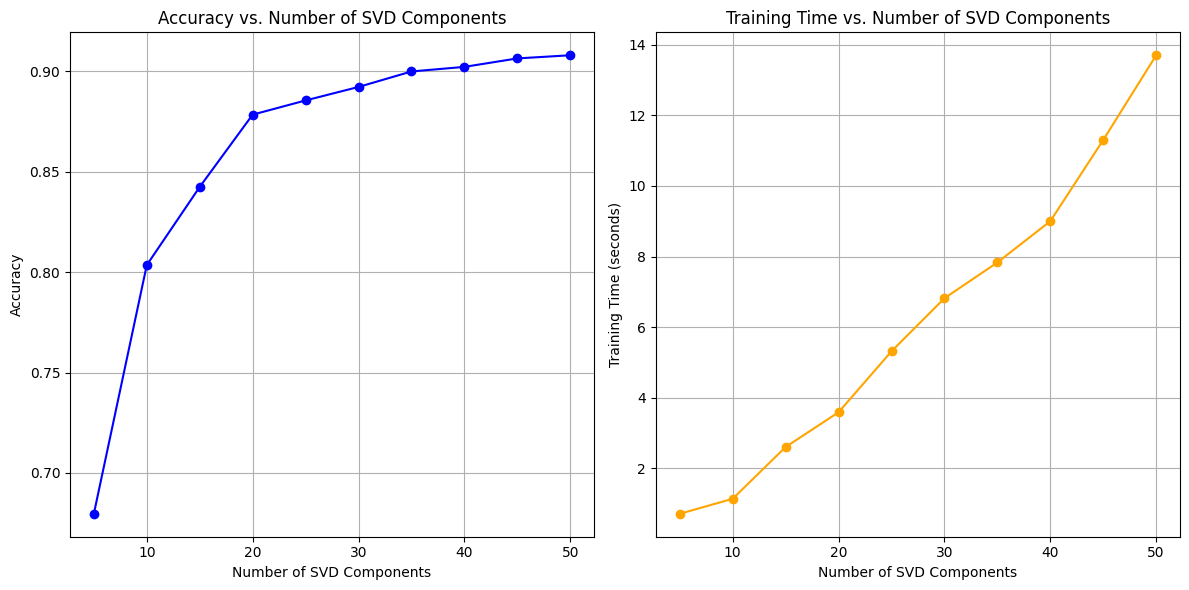

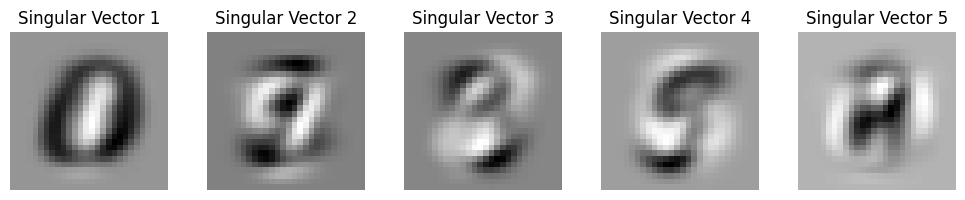

In [7]:
import matplotlib.pyplot as plt

# Extract the number of components, accuracies, and training times
n_components_list = [result["n_components"] for result in results]
accuracy_list = [result["accuracy"] for result in results]
training_time_list = [result["training_time"] for result in results]
top_eigenvectors = results[-1]["top_eigenvectors"]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(n_components_list, accuracy_list, marker='o', color='blue')
plt.title("Accuracy vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_components_list, training_time_list, marker='o', color='orange')
plt.title("Training Time vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Create a separate figure for visualizing the top 5 singular vectors
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_eigenvectors[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Singular Vector {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [8]:
 #analyze how SVD impacts the performance and efficiency of the model.

'''
 From viewing the visuals, it is clear that as the number of components increase,
 especially around 20-30, the accuracy increases dramatically, and then slowly climbs after.
 Our SVD implementation shows that we can have improved accuracy with fewer components!

 It is important to also note that it seems the visual describing the training time
 in relation to number of components demonstrates an almost linear relationship,
 displaying a steady trend of time with number of componenets.

 Ideally then, it would be best if we hover around 20-30 components, where
 the model is able to achieve a relatively high accuracy while maintaining a
 reasonable training time.

'''


'\nFrom viewing the visuals, it is clear that as the number of components increase, \nespecially around 20-30, the accuracy increases dramatically, and then slowly climbs after.\nOur SVD implementation shows that we can have improved accuracy with fewer components!\n\nIt is important to also note that it seems the visual describing the training time \nin relation to number of components demonstrates an almost linear relationship, \ndisplaying a steady trend of time with number of componenets. \n\nIdeally then, it would be best if we hover around 20-30 components, where \nthe model is able to achieve a relatively high accuracy while maintaining a \nreasonable training time.\n\n'